In [82]:
%matplotlib inline

import pandas as pd
import os
from matplotlib import pyplot as plt
import requests


# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
# find the name in the current file and plot the point
        for name in got_names:
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            #plt.scatter(year,count,c=f"{name[2]}",edgecolor=(0,0,0),alpha=0.75)

In [83]:
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
arya = []
daenerys = []
jon = []
khaleesi = []
sansa = []
total_counts = []
averages = []
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for 2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
        total_counts.append(name_df[name_df["Year"]==f'{name_df["Year"][0]}']["Birth Count"].sum())
        averages.append([os.path.splitext(filename)[0][-4:],name_df["Birth Count"].mean()])
# find the name in the current file and plot the point
        for name in got_names:
            character = name[0]
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            birth_count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != '0':
                if character == "Arya":
                    arya.append([year,birth_count,'b'])
                elif character == "Daenerys":
                    daenerys.append([year,birth_count,'y'])
                elif character == "Jon":
                    jon.append([year,birth_count,'r'])
                elif character == "Khaleesi":
                    khaleesi.append([year,birth_count,'c'])
                elif character == "Sansa":
                    sansa.append([year,birth_count,'m'])

aryadf = pd.DataFrame(arya, columns=["Year","Birth Count","Color"])
daenerysdf = pd.DataFrame(daenerys, columns=["Year","Birth Count","Color"])
jondf = pd.DataFrame(jon, columns=["Year","Birth Count","Color"])
khaleesidf = pd.DataFrame(khaleesi, columns=["Year","Birth Count","Color"])
sansadf = pd.DataFrame(sansa, columns=["Year","Birth Count","Color"])



In [3]:
#The above code was used to create the series of analysis I created below. 
#This code provides results for each GoT by count of name

# My goal was transform the data from counts, to percentage of all babies born. The objective in doing so is to 
# to see if the growth of particular names follows or strays from the growth/decline in birth rate. 
# By converting the metric from count to percentage, data for names is evaluted in proportion to total births.
# Ex: If the name Arya grew by 1 baby each year, and the population grew by 1 person each year, 
#    then percent of all babies with the name Arya would not change. 
#    If Arya naming occurences has indeed been affected by GoT then we expect to see that the growth of the name 
#    is independent from the birthing trends(as births decline, instances of Arya should not decline accordingly.)
#    Or we should see that the growth trend prior to GoT is different post GoT

# To do this I have done the following:
# Replot the name count v year graph, to percentage of all babies v year
# Calculate and plot the difference in percentage year over year: growth rate(roughly)
# Calculate and plot the average growth prior to 2011(2001-2010), post GoT(2011-2017)

In [84]:
#create total counts df using the list total_counts,
# which contains a list of total count values for each year starting at year 2000

#Assign list of years. Used to append to data frame of total_counts
years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
# Build total_count DF
total_count_df = pd.DataFrame(total_counts)
total_count_df["Year"] = years

total_count_df

,0,Year
0,3778079,2000
1,3741451,2001
2,3736042,2002
3,3799971,2003
4,3818361,2004
5,3842004,2005
6,3952932,2006
7,3994007,2007
8,3926358,2008
9,3815638,2009


In [85]:
# Calculate the percentage of all babies with a GoT name, out of all babies born. 
# Some of names dont appear on record until after yr.2000. For those names I used a merge function.
# By using merge, only data from the above^^^( total_count_df ) is paired,
# with matching years in the dataframes for each character which Joseph made 
# Ex: sansadf(made by Joseph) counts "Year", "Birth Count", "Color" for name:Sansa. For years 2013-2017
#     by using merge only data for 2013-2017 from 2013-2017 is merged.

# I then created a new data frames to hold all the data, for each character.

# Since total_counts list has the same number of rows. It could be added directly to the aryadf
aryadf["Tot all Babies"] = total_counts
# Calculate percentage by doing column division
aryadf["percent"] = ((aryadf["Birth Count"]/aryadf["Tot all Babies"])*100)
# Create a new data frame so the variable used is more descriptive.
arya_percent = aryadf.copy()
arya_percent["Color"]='b'
arya_percent['Name'] = 'Arya'
arya_percent['Year']=arya_percent['Year'].astype(int)

# daenerysdf starts post 2000. Merge total_counts_df data into a new Df
daenerys_percent = pd.merge(daenerysdf,total_count_df)
daenerys_percent = daenerys_percent.rename(columns ={0:"Tot all Babies"})
daenerys_percent["percent"] = (daenerys_percent["Birth Count"]/daenerys_percent["Tot all Babies"])*100
daenerys_percent["Color"]= 'y'
daenerys_percent['Name']= 'Daenerys'
daenerys_percent['Year']=daenerys_percent['Year'].astype(int)


# Same process as Arya
jondf["Tot all Babies"] = total_counts
jondf["percent"] = (jondf["Birth Count"]/jondf["Tot all Babies"])*100
jon_percent = jondf.copy()
jon_percent['Color']='r'
jon_percent['Name']='Jon'
jon_percent['Year']=jon_percent['Year'].astype(int)

khaleesi_percent = pd.merge(khaleesidf,total_count_df)
khaleesi_percent = khaleesi_percent.rename(columns={0:"Tot all Babies"})
khaleesi_percent["percent"] = (khaleesi_percent["Birth Count"]/khaleesi_percent["Tot all Babies"])*100
khaleesi_percent["Color"]='c'
khaleesi_percent['Name']='Khaleesi'
khaleesi_percent['Year']=khaleesi_percent['Year'].astype(int)

sansa_percent = pd.merge(sansadf,total_count_df)
sansa_percent= sansa_percent.rename(columns = {0:"Tot all Babies"})
sansa_percent["percent"]= sansa_percent["Birth Count"]/sansa_percent["Tot all Babies"]*100
sansa_percent["Color"] = 'm'
sansa_percent['Name']='Sansa'
sansa_percent['Year']=sansa_percent['Year'].astype(int)




In [25]:
# ### ########Test for plotting in a for loop

# percent_dflist = [arya_percent,daenerys_percent,jon_percent,khaleesi_percent,sansa_percent]
# all_percents = []
# all_year=[]
# for e in percent_dflist:
#     percent_change = []
#     yearly_change = []
#     for i in e.index:
#         try:
#             percent_change.append(round(e["percent"][i+1]-e["percent"][i],8))
#             yearly_change.append(str(e["Year"][i]+ "-" + e["Year"][i+1]))
#         except(KeyError):
#             break
#     #plt.plot(yearly_change,percent_change,color=f"{e['Color'][0]}")
# #plt.xticks(rotation=90)
# #plt.grid()
# #plt.show()
             

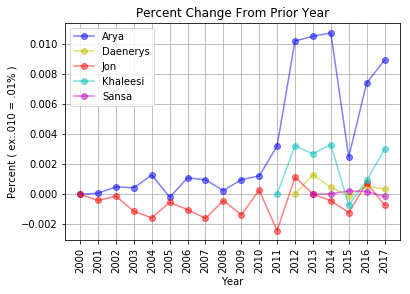

,Year,Birth Count,Color,Tot all Babies,percent,Name,Percent Change(interval),Interval
0,2000,34,b,3778079,0.000900,Arya,0.000000,2000
1,2001,36,b,3741451,0.000962,Arya,0.000062,2001-2000
2,2002,54,b,3736042,0.001445,Arya,0.000483,2002-2001
3,2003,71,b,3799971,0.001868,Arya,0.000423,2003-2002
4,2004,120,b,3818361,0.003143,Arya,0.001274,2004-2003
5,2005,113,b,3842004,0.002941,Arya,-0.000202,2005-2004
6,2006,159,b,3952932,0.004022,Arya,0.001081,2006-2005
7,2007,199,b,3994007,0.004982,Arya,0.000960,2007-2006
8,2008,205,b,3926358,0.005221,Arya,0.000239,2008-2007
9,2009,236,b,3815638,0.006185,Arya,0.000964,2009-2008


<Figure size 432x288 with 0 Axes>

In [100]:
# Calculate percent change from the prior year. 
# This will add columns of data to each dataframe in the list , then plot that data.

percent_dflist = [arya_percent,daenerys_percent,jon_percent,khaleesi_percent,sansa_percent]

for e in percent_dflist:
    percent_change = []
    yearly_change = []    
    for i in e.index:
        try:
            percent_change.append(round(e["percent"][i]-e["percent"][i-1],8))
            yearly_change.append(str(e["Year"][i])+ "-" + str(e["Year"][i-1]))
        except(KeyError):
            percent_change.append(0)
            yearly_change.append(str(e["Year"][i]))    
    e["Percent Change(interval)"]=percent_change
    e["Interval"]=yearly_change
    plt.plot(e['Year'].astype(str),e['Percent Change(interval)'],label=f"{e['Name'][0]}", marker='o', color=f"{e['Color'][0]}", alpha=.50)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Percent Change From Prior Year')
plt.ylabel('Percent ( ex:.010 = .01% )')
plt.xlabel("Year")
plt.grid()
plt.show()
plt.savefig("Graph_Images/GoT/Growth.png")

arya_percent
    #Check for loop process and result         
    #print(range(len(e)),len(percent_change))   
             

In [99]:
### Calculate the average rate of growth prior to 2011 and post 2011 for Arya and Jon since they have data prior to 2011.
aryagrowth_2011_prioravg = round(arya_percent[arya_percent["Year"]< 2011]["Percent Change(interval)"].mean(),10)
aryagrowth_2011_prioravg

aryagrowth_2011_postavg = round(arya_percent[arya_percent["Year"]> 2011]["Percent Change(interval)"].mean(),10)
aryagrowth_2011_postavg

a_growth_diff =aryagrowth_2011_postavg - aryagrowth_2011_prioravg
a_growth_diff

jongrowth_2011_prioravg = round(jon_percent[jon_percent["Year"]< 2011]["Percent Change(interval)"].mean(),10)

jongrowth_2011_postavg = round(jon_percent[arya_percent["Year"]> 2011]["Percent Change(interval)"].mean(),15)


j_growth_diff =jongrowth_2011_postavg - jongrowth_2011_prioravg
j_growth_diff

growth_priorpost_2011 = pd.DataFrame({"Name":["Arya","Jon"],
                                      "Avg Growth '00-'11":[aryagrowth_2011_prioravg,jongrowth_2011_prioravg],
                                     "Avg Growth '11-'17'":[aryagrowth_2011_postavg,jongrowth_2011_postavg],
                                     "Difference":[a_growth_diff,j_growth_diff]})
growth_priorpost_2011

,Name,Avg Growth '00-'11,Avg Growth '11-'17',Difference
0,Arya,0.000591,0.008366,0.007776
1,Jon,-0.000728,-0.000085,0.000644


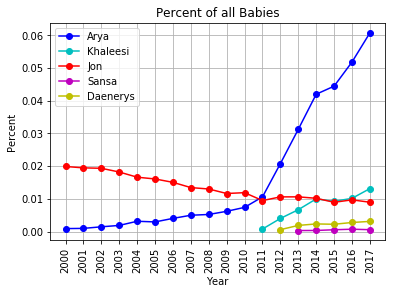

In [106]:
plt.plot(arya_percent["Year"].astype(str),arya_percent["percent"],label="Arya",marker ="o",color='b')
plt.plot(khaleesi_percent["Year"].astype(str),khaleesi_percent["percent"],label="Khaleesi",marker ="o",color='c')
plt.plot(jon_percent["Year"].astype(str),jon_percent["percent"],label="Jon",marker ="o",color='r')
plt.plot(sansa_percent["Year"].astype(str),sansa_percent["percent"],label="Sansa",marker ="o",color='m')
plt.plot(daenerys_percent["Year"].astype(str),daenerys_percent["percent"],label="Daenerys",marker ="o",color='y')
plt.xticks(rotation=90)
plt.title("Percent of all Babies")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.legend(loc='best')
plt.grid()
plt.savefig("Graph_Images/GoT/percent_all_babies.png")
plt.show()

